# Symulowanie wizualne - sieci neuronowe

In [1]:
from platform import python_version
python_version()

'3.8.5'

In [2]:
import glob
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from tensorflow import keras
import numpy as np

In [3]:
path_to_model_seq = 'models/seq'
path_to_model_cnn = 'models/cnn'

shape_x = 204
shape_y = 120

In [4]:
print(f"Devices: {tf.config.list_physical_devices()}")

Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Wczytywanie danych

In [5]:
trees_1 = []
trees_4 = []

trees_1 += glob.glob('Testy/screenshots/1_Sun/*.jpg')
trees_1 += glob.glob('Testy/screenshots/1_Night/*.jpg')
trees_4 += glob.glob('Testy/screenshots/0,2,3,4_Night/*.jpg')
trees_4 += glob.glob('Testy/screenshots/0,2,3,4_Sun/*.jpg')

y = [1] * len(trees_1) + [0] * len(trees_4)

In [6]:
trees = []
for path in trees_1 + trees_4:
    img = cv.imread(path)
    trees += [cv.resize(img, (shape_x, shape_y))/255]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(trees, y, test_size=0.33, random_state=1)

In [8]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

564
564
279
279


## Perceptron wielowarstwowy

In [9]:
if(os.path.exists(path_to_model_seq)):
    model = keras.models.load_model(path_to_model_seq)

else:
    model = keras.Sequential()
    model.add(keras.layers.Dense(500, input_dim=shape_x*shape_y*3, activation='relu'))
    model.add(keras.layers.Dense(200, activation='relu', input_dim=8))
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

    model.fit([x.flatten().tolist() for x in X_train], y_train, epochs=5, batch_size=10)

Epoch 1/5
57/57 [==============================] - 9s 138ms/step - loss: 2.7863 - accuracy: 0.5499
Epoch 2/5
57/57 [==============================] - 8s 136ms/step - loss: 1.0957 - accuracy: 0.5371
Epoch 3/5
57/57 [==============================] - 8s 137ms/step - loss: 0.7190 - accuracy: 0.5542
Epoch 4/5
57/57 [==============================] - 8s 137ms/step - loss: 0.8497 - accuracy: 0.5640
Epoch 5/5
57/57 [==============================] - 8s 144ms/step - loss: 0.6460 - accuracy: 0.6633


In [10]:
_, accuracy = model.evaluate([x.flatten().tolist() for x in X_test], y_test)
print('Seq acc: %.2f' % (accuracy*100))

9/9 [==============================] - 1s 44ms/step - loss: 0.8108 - accuracy: 0.5663
Seq acc: 56.63


In [11]:
model.save(path_to_model_seq)

INFO:tensorflow:Assets written to: models/seq\assets


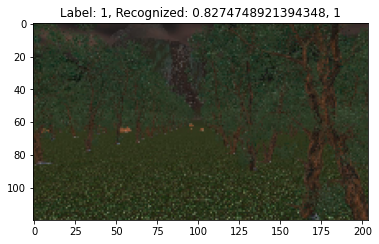

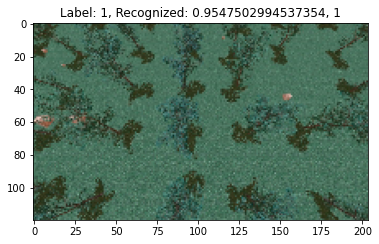

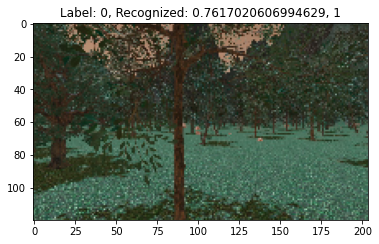

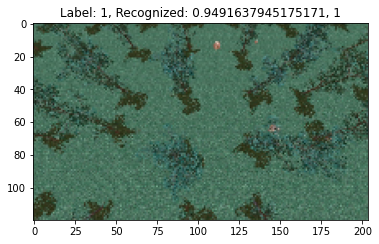

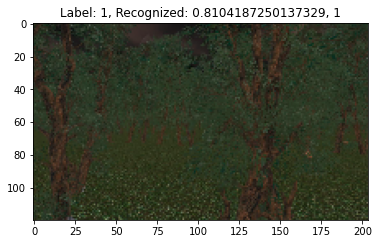

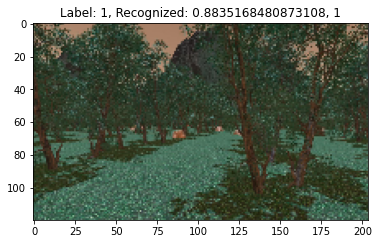

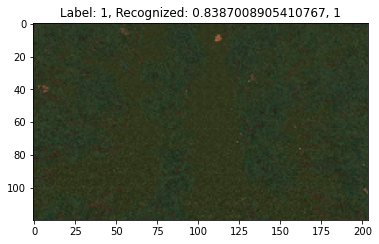

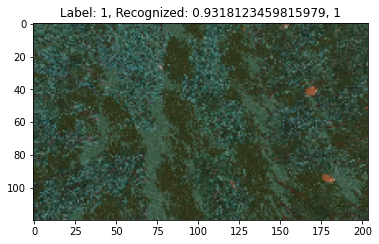

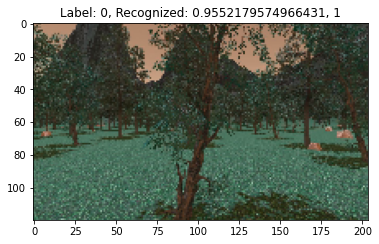

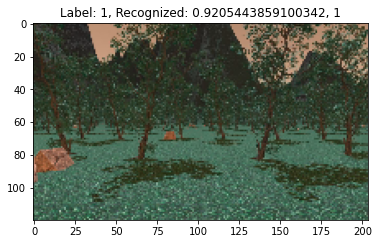

In [12]:
for i in range(10):
   plt.imshow(X_test[i])
   recognized = model.predict([X_test[i].flatten().tolist()])[0][0]
   plt.title(f"Label: {y_test[i]}, Recognized: {recognized}, {round(recognized)}")
   plt.show()

## Sieci konwolucyjne

In [13]:
if(os.path.exists(path_to_model_cnn)):
    model_cnn = keras.models.load_model(path_to_model_cnn)

else:
    model_cnn = keras.Sequential()
    model_cnn.add(keras.layers.Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(shape_y, shape_x,3)))
    model_cnn.add(keras.layers.MaxPool2D(pool_size=(1,1)))
    model_cnn.add(keras.layers.Flatten())
    model_cnn.add(keras.layers.Dense(100, activation='relu'))
    model_cnn.add(keras.layers.Dense(1, activation='sigmoid'))

    model_cnn.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    model_cnn.fit([x.tolist() for x in X_train], y_train, epochs=5, batch_size=10)

Epoch 1/5
57/57 [==============================] - 23s 381ms/step - loss: 5.8840 - accuracy: 0.4984
Epoch 2/5
57/57 [==============================] - 21s 369ms/step - loss: 0.5558 - accuracy: 0.7185
Epoch 3/5
57/57 [==============================] - 21s 375ms/step - loss: 0.2545 - accuracy: 0.9049
Epoch 4/5
57/57 [==============================] - 23s 402ms/step - loss: 0.0961 - accuracy: 0.9934
Epoch 5/5
57/57 [==============================] - 23s 400ms/step - loss: 0.0732 - accuracy: 0.9868


In [14]:
_, accuracy = model_cnn.evaluate([x.tolist() for x in X_test], y_test)
print('CNN acc: %.2f' % (accuracy*100))

9/9 [==============================] - 2s 159ms/step - loss: 0.4964 - accuracy: 0.7706
CNN acc: 77.06


In [15]:
model_cnn.save(path_to_model_cnn)

INFO:tensorflow:Assets written to: models/cnn\assets


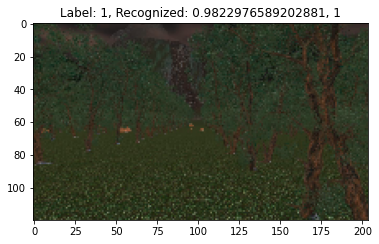

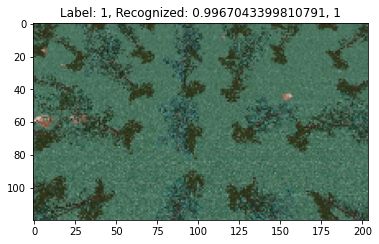

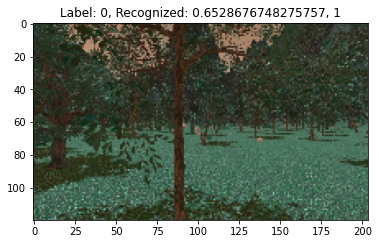

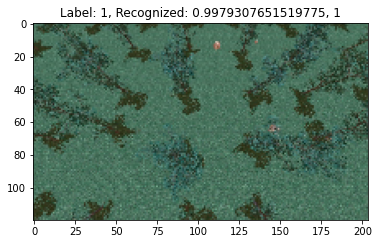

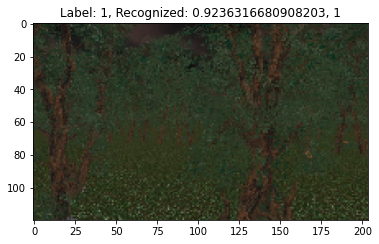

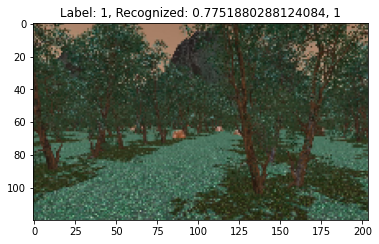

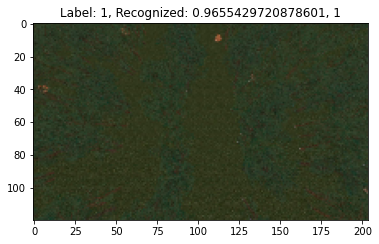

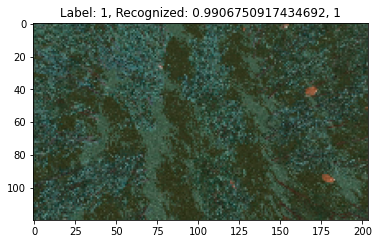

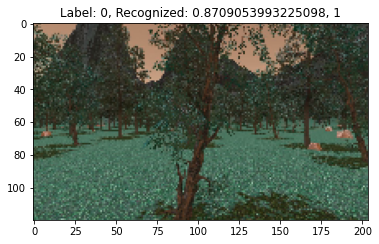

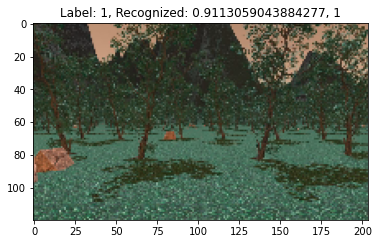

In [16]:
for i in range(10):
   plt.imshow(X_test[i])
   recognized = model_cnn.predict([X_test[i].tolist()])[0][0]
   plt.title(f"Label: {y_test[i]}, Recognized: {recognized}, {round(recognized)}")
   plt.show()